### Representing Neural Networks
https://app.dataquest.io/m/241/representing-neural-networks/5/generating-regression-data

generating data using sklearn
    sklearn.datasets.make_regression()
    sklearn.datasets.make_classification()
    sklearn.datasets.make_moons()

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
data = make_regression(n_samples=100, n_features=3, random_state=1)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

In [16]:
len(data)

2

In [21]:
data[0][0:2]

array([[ 1.29322588, -0.61736206, -0.11044703],
       [-2.793085  ,  0.36633201,  1.93752881]])

In [22]:
data[1][0:2]

array([-10.37865986,  25.5124503 ])

In [20]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = make_regression(n_samples=100, n_features=3, random_state=1)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

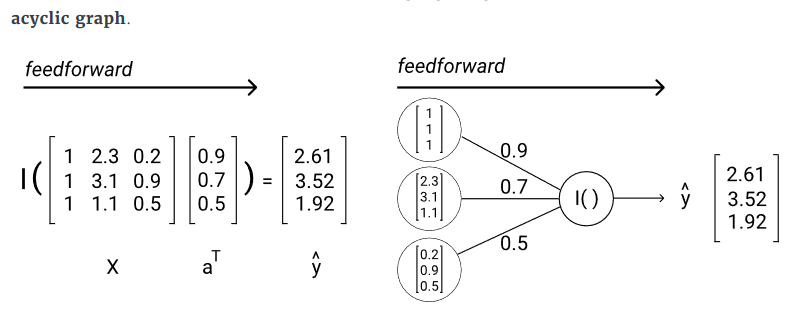

(array([ 1.,  3.,  5., 13., 28., 23., 18.,  7.,  1.,  1.]),
 array([-321.89570014, -254.50666632, -187.1176325 , -119.72859868,
         -52.33956486,   15.04946896,   82.43850278,  149.8275366 ,
         217.21657042,  284.60560424,  351.99463806]),
 <a list of 10 Patch objects>)

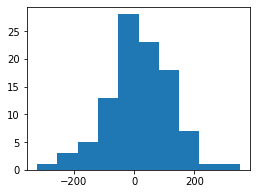

In [5]:
features['bias'] = 1
from sklearn.linear_model import SGDRegressor
import numpy as np
def train(features, labels):
    lr = SGDRegressor(max_iter=100, tol=0.2)
    lr.fit(features, labels)
    weights = lr.coef_
    return weights

def feedforward(features, weights):
    predictions = np.dot(features, weights.T)
    return predictions

train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)
plt.figure(figsize=(4,3))
plt.hist(linear_predictions)

In [6]:
from sklearn.datasets import make_classification
data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(data[0])
class_labels = pd.Series(data[1])

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

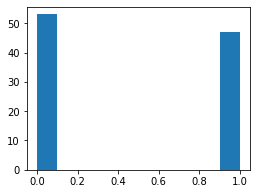

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])
class_features['bias'] = 1
def log_train(class_features, class_labels):
    sg = SGDClassifier(max_iter=1000)
    sg.fit(class_features, class_labels)
    weight = sg.coef_
    return weight

def sigmoid(linear_combination):
    y = 1/(1 + np.exp(-linear_combination))
    return y

def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(class_features, log_train_weights.T)
    log_predictions = sigmoid(linear_combination)
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    return log_predictions
            
log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)
plt.figure(figsize=(4,3))
plt.hist(log_predictions)

#### Nonlinear Activation Functions

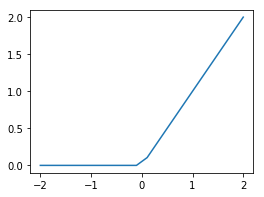

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
x = np.linspace(-2, 2, 20)
def relu(values):
    return np.maximum(values, 0)

relu_y = relu(x)
plt.figure(figsize=(4,3))
plt.plot(x, relu_y)

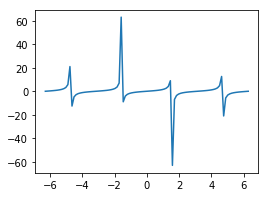

In [9]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
tan_y = np.tan(x)
plt.figure(figsize=(4,3))
plt.plot(x, tan_y)

The tangent function isn't known to be used as an activation function in neural networks (or any machine learning model really) because the periodic nature isn't a pattern that's found in real datasets.  Generally speaking, the activation functions that are used in neural networks are increasing functions. An increasing function is a function where always stays the same or increases as increases.

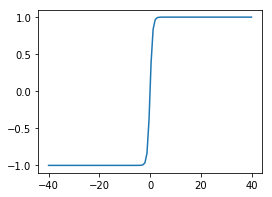

In [10]:
x = np.linspace(-40, 40, 100)
tanh_y = np.tanh(x)
plt.figure(figsize=(4,3))
plt.plot(x, tanh_y)

Both the sigmoid and the tanh functions are commonly used in neural networks for classification tasks while the ReLU function, on the other hand, is known to be more effective in regression tasks.

#### Hidden Layers

Text(0.5,0,'y')

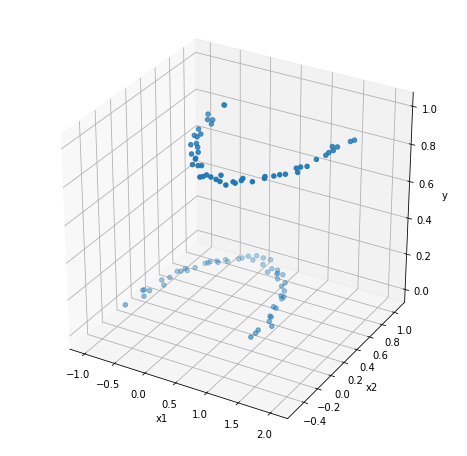

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
data = make_moons(random_state = 3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
features["bias"] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

# use one hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)

lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

nn_accuracy = accuracy_score(test_labels,nn_predictions, normalize=True, sample_weight=None) 
log_accuracy = accuracy_score(test_labels,log_predictions, normalize=True, sample_weight=None) 
print('log_accuracy:', log_accuracy, 'nn_accuracy:', nn_accuracy)

log_accuracy: 0.88 nn_accuracy: 0.48


```
accepted activation parameters:
    'identity': the identity function
    'logistic': the sigmoid function
    'tanh': the hyperbolic tangent (tanh) function
    'relu': the ReLU function ```

In [16]:
np.random.seed(8)
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)

    print(accuracies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.48, 0.48, 0.84, 0.84, 0.82, 0.84]


In [19]:
neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    # use two hidden layer
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=1000)
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.52, 0.84, 1.0, 1.0, 1.0, 1.0]
